In [10]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.models import resnet18
import os

In [2]:
# dataset_dir = "../dataset_output/libras_minds/imgs/"
train_dir = "../dataset_output/libras_minds/imgs/train/"
test_dir = "../dataset_output/libras_minds/imgs/test/"
validate_dir = "../dataset_output/libras_minds/imgs/validate/"

In [3]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
# Load dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
validate_dataset = datasets.ImageFolder(root=validate_dir, transform=transform)

In [5]:
# # Split dataset into train and test
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [6]:
# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
validate_loader = DataLoader(validate_dataset, batch_size=32, shuffle=False)

In [35]:
# Load pre-trained ResNet18 model
resnet = resnet18(pretrained=True)

/home/dudu/anaconda3/envs/tf/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dudu/anaconda3/envs/tf/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
num_ftrs = resnet.fc.in_features

In [37]:
num_features = len(os.listdir(train_dir))

In [38]:
# Modify the fully connected layer to match the number of classes
resnet.fc = nn.Linear(num_ftrs, num_features)

In [39]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=10e-5)

In [40]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
from datetime import datetime

In [42]:
epochs = 15
history = {"loss": [], "accuracy": []}
for epoch in range(epochs):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    
    resnet.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validate_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    history["loss"].append(float(loss))
    history["accuracy"].append(float(accuracy))

    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Accuracy: {accuracy:.4f}")
    print(str(datetime.now()))

Epoch 1/15, Loss: 1.5002, Val Accuracy: 0.7600
2024-03-17 14:49:49.508173
Epoch 2/15, Loss: 0.1891, Val Accuracy: 0.8200
2024-03-17 14:50:00.963200
Epoch 3/15, Loss: 0.0410, Val Accuracy: 0.8400
2024-03-17 14:50:11.594406
Epoch 4/15, Loss: 0.0184, Val Accuracy: 0.8450
2024-03-17 14:50:21.663141
Epoch 5/15, Loss: 0.0124, Val Accuracy: 0.8400
2024-03-17 14:50:32.529165
Epoch 6/15, Loss: 0.0088, Val Accuracy: 0.8400
2024-03-17 14:50:43.016671
Epoch 7/15, Loss: 0.0066, Val Accuracy: 0.8500
2024-03-17 14:50:53.355111
Epoch 8/15, Loss: 0.0051, Val Accuracy: 0.8400
2024-03-17 14:51:03.887233
Epoch 9/15, Loss: 0.0042, Val Accuracy: 0.8350
2024-03-17 14:51:14.608044
Epoch 10/15, Loss: 0.0037, Val Accuracy: 0.8450
2024-03-17 14:51:25.079000
Epoch 11/15, Loss: 0.0036, Val Accuracy: 0.8550
2024-03-17 14:51:34.387745
Epoch 12/15, Loss: 0.0030, Val Accuracy: 0.8350
2024-03-17 14:51:43.880739
Epoch 13/15, Loss: 0.0024, Val Accuracy: 0.8400
2024-03-17 14:51:54.140747
Epoch 14/15, Loss: 0.0021, Val Acc

In [43]:
resnet.eval()
correct = 0
total = 0
class_correct = list(0. for _ in range(num_features))
class_total = list(0. for _ in range(num_features))

In [44]:
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [59]:
# Evaluate on test set
resnet.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = correct / total
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

In [60]:
print(f"Accuracy on the test set: {accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Accuracy on the test set: 0.9029
Precision: 0.9187, Recall: 0.8750, F1 Score: 0.8701


In [45]:
accuracy = correct / total
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.9029


In [46]:
categories = [i+1 for i in range(num_features)]

In [47]:
precisions = []
for i in range(num_features):
    precision = class_correct[i] / class_total[i]
    precisions.append(precision)
    if precision < 1:
        print(f"Precision of class {i}: {precision:.4f}")
# plt.bar(categories, precision)

Precision of class 0: 0.8000
Precision of class 2: 0.6000
Precision of class 7: 0.2000
Precision of class 8: 0.9000
Precision of class 13: 0.8000
Precision of class 15: 0.6000
Precision of class 17: 0.6000


In [52]:
0.9375 - accuracy

-0.020312499999999956

In [48]:
from matplotlib import pyplot as plt

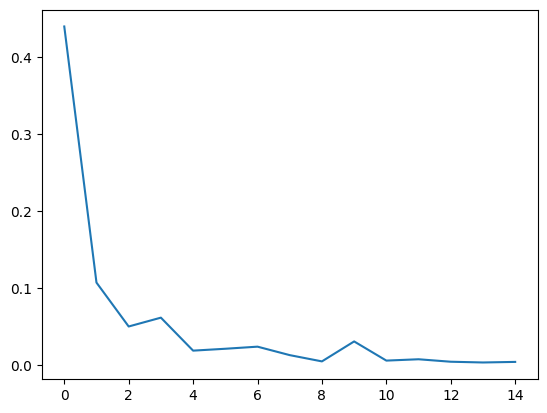

In [49]:
plt.plot(history["loss"])

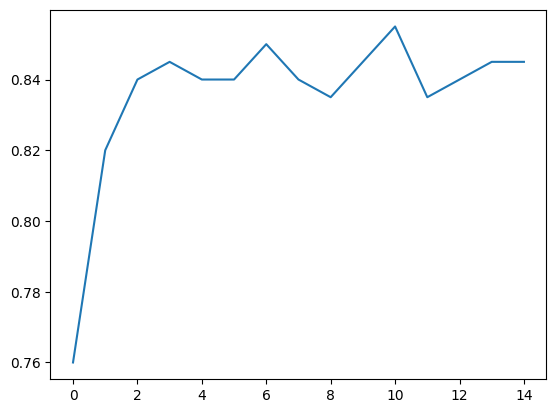

In [50]:
plt.plot(history["accuracy"])

In [56]:
from torchmetrics.functional import recall

In [ ]:
recall()